#  **Section 2: Data Quality Issues and Data Analysis**
# This script addresses two main parts:
#  **1. Data Quality Issues:**  
#    - Load and inspect the dataset.  
#    - Identify and address common data quality issues such as missing values, duplicates, 
#    - inconsistent date formats, negative values, and misclassified service categories.
#  **2. Data Analysis and Commentary:**  
#    - Create tables to analyze monthly trends, city benchmarks, and service category performance.
#    - Provide summary statistics for exploratory data analysis.

## **Importing Necessary Libraries**

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations



## **Loading Data from an Excel File**

In [2]:
# Load the dataset from the Excel file
file_path = "C:/Users/Ak/Desktop/Assignment Projects/Austin/SS Austen Bank dataset (1).xlsx"
df = pd.read_excel(file_path)

# **Section 2(a): Data Quality Issues and remedies**

In [3]:
# Display the initial few rows to inspect the dataset
print("Initial Data Overview:")
display(df.head())

Initial Data Overview:


,City bank branch,Year,Month,Service category,Customer Volume,Deposit Value (£000)
0,Oxford,2022,1,Current accounts,148.000,649.00
1,Oxford,2023,7,Bonds savings accounts,205.856,550.64
2,Oxford,2022,9,Bonds savings accounts,134.000,354.00
3,Edinburgh,2023,9,Children’s savings accounts,27.500,161.00
4,Edinburgh,2021,5,Children’s savings accounts,44.000,244.00


# **Checking Datatypes of Dataframe**

In [4]:
# Print data types of each column to check for any inconsistencies
print("\nData Types:")
print(df.dtypes)


Data Types:
City bank branch         object
Year                      int64
Month                     int64
Service category         object
Customer Volume         float64
Deposit Value (£000)    float64
dtype: object


# **Checking the Values Count of Year Column**

In [5]:
df['Year'].value_counts()

Year
2022    216
2021    216
2023    210
2073      6
Name: count, dtype: int64

# **Through Mapping Converting 2073 to 2023 in Year Column, Standardizing the Data Inconsistency**

In [6]:
year_mapping = {2073 : 2023 } # Replace incorrect year
# Apply the mapping to fix the issue
df['Year'] = df['Year'].replace(year_mapping)
# Display cleaned DataFrame
print(df['Year'].value_counts())

Year
2022    216
2023    216
2021    216
Name: count, dtype: int64


# **Standardizing the Year, Month Column**
# Convert the 'Year','Month' into Date column in datetime format to ensure consistency.
# This will help in aggregating data by year, month, and quarter later on.

In [7]:
# Create a 'Date' column using 'Year' and 'Month' columns
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

# **Identifying Missing Values**

In [8]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
City bank branch        0
Year                    0
Month                   0
Service category        0
Customer Volume         3
Deposit Value (£000)    3
Date                    0
dtype: int64


# **Handling numeric variables, fill missing values using the median.**

In [9]:
# Loop through the specified numeric columns to handle missing values
for col in ['Customer Volume', 'Deposit Value (£000)']:
    # Check if the column exists in the DataFrame (to avoid errors)
    if col in df.columns:
        # Calculate the median value for the column (ignoring NaNs)
        median_val = df[col].median()
        # Fill missing values with the median and assign back to the column
        df[col] = df[col].fillna(median_val)  # Avoids inplace modification warning
        
# Checking the null values from Customer value and Deposit Value (£000) after filling it with median
print(df[['Customer Volume', 'Deposit Value (£000)']].isnull().sum())

Customer Volume         0
Deposit Value (£000)    0
dtype: int64


# **Identifying If there is duplicate values in Dataframe** 

In [10]:
# Check for and remove any duplicate records to ensure data accuracy.
df.duplicated().sum()

np.int64(0)

# **Checking Negative Values in Customer Value & Deposit Value (£000) then Imputing NaN and Median replacing those Values**

In [11]:
# Iterate over the specified columns
for col in ['Customer Volume', 'Deposit Value (£000)']:
    if col in df.columns:
        # Count the number of negative values
        num_negatives = (df[col] < 0).sum()

        if num_negatives > 0:
            print(f"Found {num_negatives} negative values in '{col}'. Replacing with NaN and imputing median.")

            # Replace negative values with NaN (proper way to modify DataFrame)
            df.loc[df[col] < 0, col] = np.nan  

            # Compute the median (excluding NaN values)
            median_value = df[col].median()

            # Fill missing values with the median and assign back properly to avoid chained assignment
            df[col] = df[col].fillna(median_value)
            
            # Print confirmation message
            print(f"Imputed missing values in '{col}' with median: {median_value}")
        else:
            print(f"No negative values found in '{col}'.")

Found 3 negative values in 'Customer Volume'. Replacing with NaN and imputing median.
Imputed missing values in 'Customer Volume' with median: 81.5
Found 3 negative values in 'Deposit Value (£000)'. Replacing with NaN and imputing median.
Imputed missing values in 'Deposit Value (£000)' with median: 239.0


# **Checking the Value Counts of Service category**

In [12]:
df['Service category'].value_counts()

Service category
Current accounts                    108
Certificates of deposit             108
Money savings accounts              108
Individual savings account (ISA)    107
Children’s savings accounts         105
Bonds savings accounts              105
Bond%%%% savings accounts             3
Children’s $@                         3
Individual savings account $$$$$      1
Name: count, dtype: int64

# **Through Mapping, Standardizing the Service category**

In [13]:
# Define a dictionary to map inconsistent category names to their correct versions
category_mapping = {
    'Individual savings account (ISA)': 'Individual savings account',  # Standardize ISA naming
    'Individual savings account $$$$$': 'Individual savings account',  # Remove extra characters
    'Bond%%%% savings accounts': 'Bonds savings accounts',  # Fix special character issue
    "Children’s $@": "Children’s savings accounts"  # Standardize children's account name
}
# Replace incorrect or inconsistent category names in the 'Service category' column
df['Service category'] = df['Service category'].replace(category_mapping)
# Display the count of unique values in the updated 'Service category' column
print(df['Service category'].value_counts())

Service category
Current accounts               108
Bonds savings accounts         108
Children’s savings accounts    108
Certificates of deposit        108
Individual savings account     108
Money savings accounts         108
Name: count, dtype: int64


# **Checking the Value Counts of City bank branch**

In [14]:
df["City bank branch"].value_counts()

City bank branch
Oxford         216
Edinburgh      216
Cardiff        209
Cardi££££££      7
Name: count, dtype: int64

# **Through Mapping, Standardizing the City bank branch**

In [15]:
# Define a dictionary to map incorrect branch names to their correct versions
branch_mapping = {
    'Cardi££££££': 'Cardiff'  # Fix incorrect characters in 'Cardiff'
}
# Apply the mapping to replace incorrect branch names with the correct ones
df['City bank branch'] = df['City bank branch'].replace(branch_mapping)
# Display the count of unique values in the cleaned 'City bank branch' column
print(df['City bank branch'].value_counts())

City bank branch
Oxford       216
Edinburgh    216
Cardiff      216
Name: count, dtype: int64


# **Section 2(b): Data Analysis and Commentary**
# Next, we will create tables to analyze the dataset.
# We add new columns for 'Year', 'Month', and 'Quarter' based on the standardized date.

In [16]:
# Create new time-related columns for grouping data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# **Table 1: Monthly Trends in Total Customer Volume and Deposit Value**
# This table aggregates the total customer volume and deposit value by month and year.

In [17]:
# Group data by 'Month' and 'Year' and calculate the total (sum) for each period
table1 = df.groupby(['Month', 'Year']).agg({
    'Customer Volume': 'sum',  # Sum up total customer volume per month/year
    'Deposit Value (£000)': 'sum'  # Sum up total deposit value per month/year
}).reset_index()  # Reset index to keep 'Month' and 'Year' as columns

# Sort the table chronologically by 'Month' and 'Year'
table1 = table1.sort_values(['Month', 'Year'])

# Print a title for clarity
print("\nTable 1: Monthly Trends in Total Customer Volume and Deposit Value")

# Display the final grouped and sorted table
display(table1)


Table 1: Monthly Trends in Total Customer Volume and Deposit Value


,Month,Year,Customer Volume,Deposit Value (£000)
0,1,2021,1305.000,4098.250
1,1,2022,1265.000,4152.250
2,1,2023,1434.000,4117.750
3,2,2021,1419.500,3465.500
4,2,2022,1387.000,4370.250
5,2,2023,1393.000,4501.250
6,3,2021,1623.000,5125.750
7,3,2022,1546.500,5213.250
8,3,2023,1659.500,5097.750
9,4,2021,1746.000,6256.500


# **Explanation of Table 1:**
# - The table displays aggregated values of customer volume and deposit value for each month over the three-year period.
# - Trends such as seasonal variations and overall growth can be observed.

# **Table 2: Benchmark Comparisons by City (Quarterly Averages)**
# This table calculates the average customer volume and deposit value for each city by quarter and year.

In [18]:
# Group data by 'City bank branch', 'Quarter', and 'Year'
# Compute the average (mean) for 'Customer Volume' and 'Deposit Value (£000)' in each group
table2 = df.groupby(['City bank branch', 'Quarter', 'Year']).agg({
    'Customer Volume': 'mean',  # Calculate the average number of customers per quarter
    'Deposit Value (£000)': 'mean'  # Calculate the average deposit value per quarter
}).reset_index()  # Reset index to maintain 'City bank branch', 'Quarter', and 'Year' as columns

# Sort the table by 'City bank branch', 'Quarter', and 'Year' for better chronological readability
table2 = table2.sort_values(['City bank branch', 'Quarter', 'Year'])

# Print a title for clarity
print("\nTable 2: Benchmark Comparisons by City (Quarterly Averages)")

# Display the final grouped and sorted table
display(table2)


Table 2: Benchmark Comparisons by City (Quarterly Averages)


,City bank branch,Quarter,Year,Customer Volume,Deposit Value (£000)
0,Cardiff,1,2021,61.361111,161.333333
1,Cardiff,1,2022,49.722222,183.444444
2,Cardiff,1,2023,66.500000,184.527778
3,Cardiff,2,2021,62.722222,218.972222
4,Cardiff,2,2022,64.611111,181.888889
5,Cardiff,2,2023,75.111111,214.000000
6,Cardiff,3,2021,67.222222,212.638889
7,Cardiff,3,2022,59.666667,225.277778
8,Cardiff,3,2023,72.055556,232.500000
9,Cardiff,4,2021,57.444444,196.250000


# **Explanation of Table 2:**
# - This table provides average values for customer volume and deposit value per quarter for each city.
# - It helps benchmark the performance of different branches across Cardiff, Oxford, and Edinburgh.

# **Table 3: Benchmark Comparisons of Service Categories (Quarterly Averages)**
# This table examines the performance of each service category by calculating quarterly averages.

In [19]:
# Group data by 'Service category', 'Quarter', and 'Year'
# Compute the average (mean) for 'Customer Volume' and 'Deposit Value (£000)' in each group
table3 = df.groupby(['Service category', 'Quarter', 'Year']).agg({
    'Customer Volume': 'mean',  # Calculate the average number of customers per quarter for each service category
    'Deposit Value (£000)': 'mean'  # Calculate the average deposit value per quarter for each service category
}).reset_index()  # Reset index to maintain 'Service category', 'Quarter', and 'Year' as columns

# Sort the table by 'Service category', 'Quarter', and 'Year' for better chronological readability
table3 = table3.sort_values(['Service category', 'Quarter', 'Year'])

# Print a title for clarity
print("\nTable 3: Benchmark Comparisons of Service Categories (Quarterly Averages)")

# Display the final grouped and sorted table
display(table3)


Table 3: Benchmark Comparisons of Service Categories (Quarterly Averages)


,Service category,Quarter,Year,Customer Volume,Deposit Value (£000)
0,Bonds savings accounts,1,2021,87.222222,212.722222
1,Bonds savings accounts,1,2022,97.388889,215.027778
2,Bonds savings accounts,1,2023,91.500000,203.972222
3,Bonds savings accounts,2,2021,94.888889,302.444444
4,Bonds savings accounts,2,2022,108.500000,285.000000
...,...,...,...,...,...
67,Money savings accounts,3,2022,98.222222,177.444444
68,Money savings accounts,3,2023,83.943556,216.220444
69,Money savings accounts,4,2021,73.888889,152.777778
70,Money savings accounts,4,2022,81.888889,193.444444


# **Explanation of Table 3:**
# - The table shows quarterly average performance (customer volume and deposit value) for each service category.
# - This analysis helps identify which services drive the highest customer engagement and deposits.

# **Exploratory Data Analysis (Summary Calculations)**
# Provide summary statistics table and seperate top & bottom performing list of service category.

In [ ]:
# Group by 'Service category' and calculate summary statistics
service_summary = df.groupby('Service category').agg({
    'Customer Volume': ['mean', 'sum', 'std'],  # Mean, Sum, Std for Customer Volume
    'Deposit Value (£000)': ['mean', 'sum', 'std']  # Mean, Sum, Std for Deposit Value
}).reset_index()

# Flatten MultiIndex columns for easier readability
service_summary.columns = ['Service category', 'AvgCustomerVolume', 'TotalCustomerVolume', 'StdCustomerVolume',
                           'AvgDepositValue', 'TotalDepositValue', 'StdDepositValue']

# Sort the summary by Average Deposit Value in descending order
service_summary = service_summary.sort_values('AvgDepositValue', ascending=False)

# Display summary
print("\nService Category Performance (sorted by AvgDepositValue):")
display(service_summary)

# Identify the top and bottom performing service categories
top_service_by_customers = service_summary.loc[service_summary['TotalCustomerVolume'].idxmax()]
bottom_service_by_customers = service_summary.loc[service_summary['TotalCustomerVolume'].idxmin()]

top_service_by_deposit = service_summary.loc[service_summary['TotalDepositValue'].idxmax()]
bottom_service_by_deposit = service_summary.loc[service_summary['TotalDepositValue'].idxmin()]

# Display top and bottom performers
print("\n📈 Top-Performing Service Category by Customer Volume:")
display(top_service_by_customers)

print("\n📉 Bottom-Performing Service Category by Customer Volume:")
display(bottom_service_by_customers)

print("\n📈 Top-Performing Service Category by Total Deposit Value:")
display(top_service_by_deposit)

print("\n📉 Bottom-Performing Service Category by Total Deposit Value:")
display(bottom_service_by_deposit)



Service Category Performance (sorted by AvgDepositValue):


,Service category,AvgCustomerVolume,TotalCustomerVolume,StdCustomerVolume,AvgDepositValue,TotalDepositValue,StdDepositValue
3,Current accounts,169.511037,18307.192,60.813496,668.034889,72147.768,239.483579
0,Bonds savings accounts,107.658259,11627.092,44.873779,277.386389,29957.730,137.135020
1,Certificates of deposit,50.893426,5496.490,24.956812,251.318981,27142.450,104.553368
4,Individual savings account,114.943167,12413.862,41.794940,227.691889,24590.724,105.489622
2,Children’s savings accounts,37.811519,4083.644,18.924485,197.359852,21314.864,89.458972
5,Money savings accounts,82.837148,8946.412,35.154772,168.813185,18231.824,80.068405



📈 Top-Performing Service Category by Customer Volume:


Service category       Current accounts
AvgCustomerVolume            169.511037
TotalCustomerVolume           18307.192
StdCustomerVolume             60.813496
AvgDepositValue              668.034889
TotalDepositValue             72147.768
StdDepositValue              239.483579
Name: 3, dtype: object


📉 Bottom-Performing Service Category by Customer Volume:


Service category       Children’s savings accounts
AvgCustomerVolume                        37.811519
TotalCustomerVolume                       4083.644
StdCustomerVolume                        18.924485
AvgDepositValue                         197.359852
TotalDepositValue                        21314.864
StdDepositValue                          89.458972
Name: 2, dtype: object


📈 Top-Performing Service Category by Total Deposit Value:


Service category       Current accounts
AvgCustomerVolume            169.511037
TotalCustomerVolume           18307.192
StdCustomerVolume             60.813496
AvgDepositValue              668.034889
TotalDepositValue             72147.768
StdDepositValue              239.483579
Name: 3, dtype: object


📉 Bottom-Performing Service Category by Total Deposit Value:


Service category       Money savings accounts
AvgCustomerVolume                   82.837148
TotalCustomerVolume                  8946.412
StdCustomerVolume                   35.154772
AvgDepositValue                    168.813185
TotalDepositValue                   18231.824
StdDepositValue                     80.068405
Name: 5, dtype: object

# **Section 3: Data charting and commentary**
# Import Visualization Libraries

In [21]:
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns# For statistical data visualization

## **Deposit Value Trends Across Cities Over Time** ##

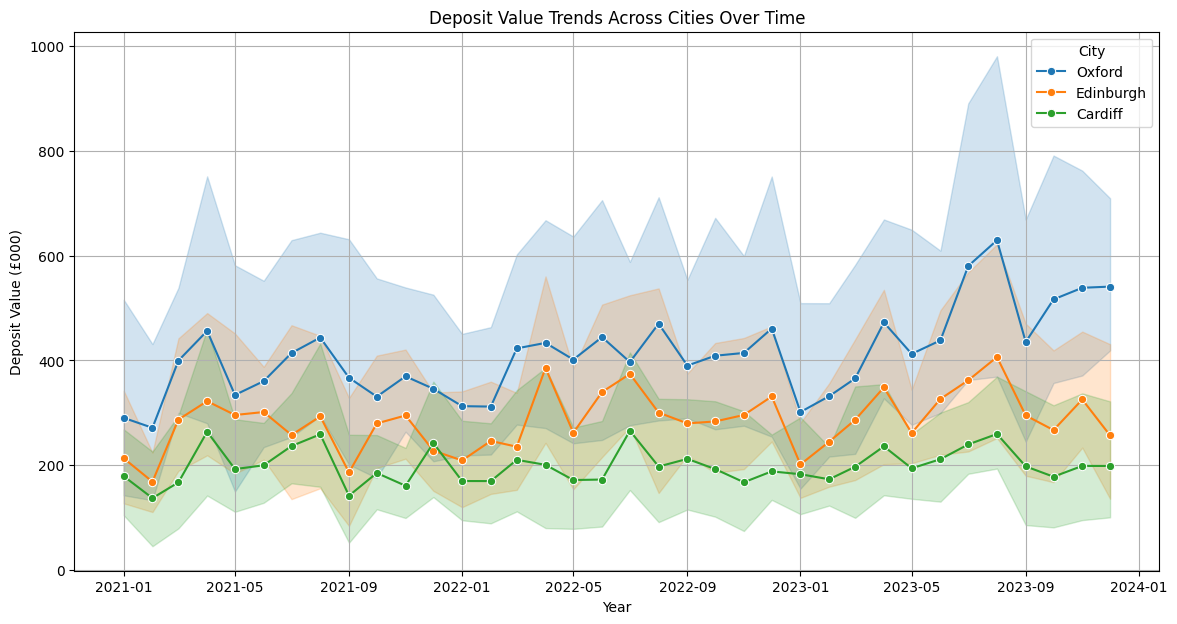

In [22]:
# Set figure size for better visibility
plt.figure(figsize=(14, 7))

# Create a line plot showing deposit value trends over time for each city branch
sns.lineplot(data=df, x='Date', y='Deposit Value (£000)', hue='City bank branch', marker='o')

# Set the title of the chart
plt.title("Deposit Value Trends Across Cities Over Time")

# Label the x-axis as 'Year'
plt.xlabel("Year")

# Label the y-axis as 'Deposit Value (£000)'
plt.ylabel("Deposit Value (£000)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a legend with the title 'City' to differentiate city bank branches
plt.legend(title="City")

# Add a grid to the background for better visualization
plt.grid(True)

# Display the plot
plt.show()

##  **Customer Volume & Deposit Value by Service Category (Dual-Axis Bar Chart)** ##

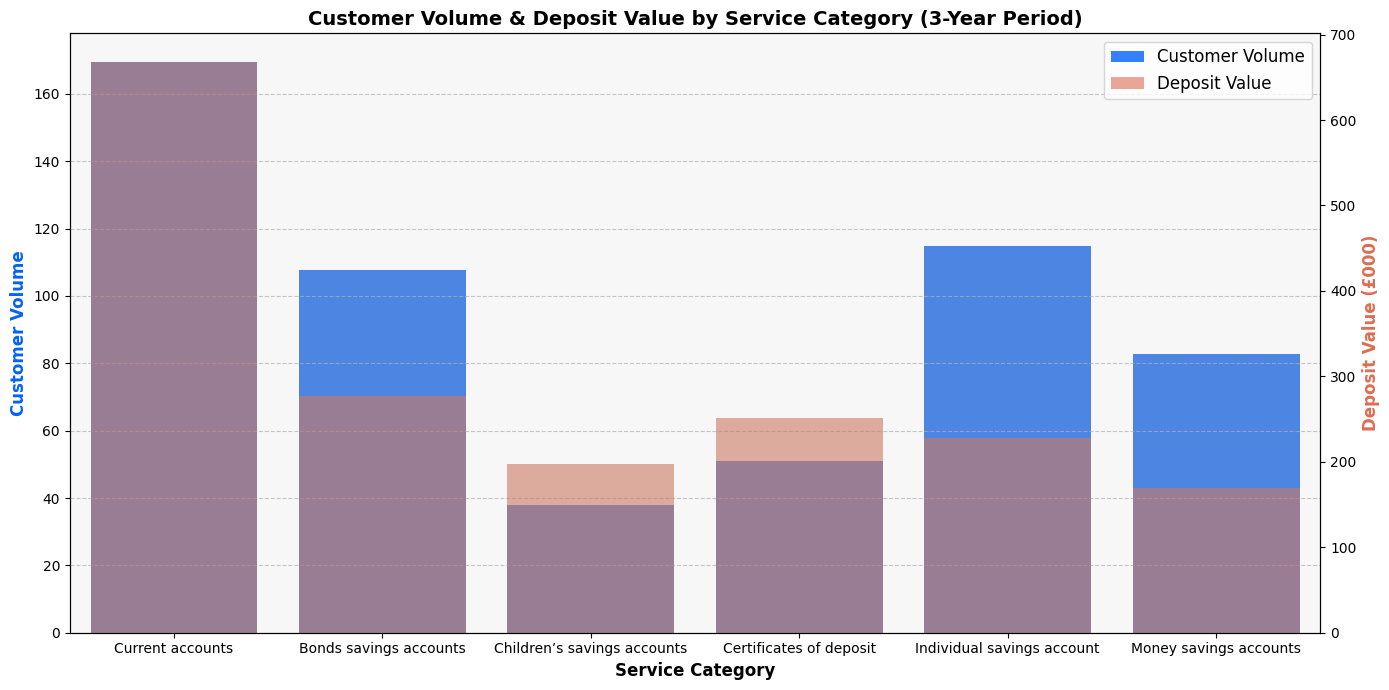

In [23]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Define colors for better contrast
customer_color = "#0361fc"  # Blue
deposit_color = "#dd6d52"  # Orange

# Plot Customer Volume (without error bars)
sns.barplot(data=df, x='Service category', y='Customer Volume', ax=ax1, 
            color=customer_color, alpha=0.8, errorbar=None)  # Fixed warning

# Create secondary Y-axis for Deposit Value
ax2 = ax1.twinx()

# Plot Deposit Value (without error bars)
sns.barplot(data=df, x='Service category', y='Deposit Value (£000)', ax=ax2, 
            color=deposit_color, alpha=0.6, errorbar=None)  # Fixed warning

# Improve labels and title
ax1.set_title("Customer Volume & Deposit Value by Service Category (3-Year Period)", 
              fontsize=14, fontweight='bold')
ax1.set_xlabel("Service Category", fontsize=12, fontweight='bold')
ax1.set_ylabel("Customer Volume", fontsize=12, fontweight='bold', color=customer_color)
ax2.set_ylabel("Deposit Value (£000)", fontsize=12, fontweight='bold', color=deposit_color)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add grid and background color for clarity
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_facecolor("#F7F7F7")
ax2.set_facecolor("#F7F7F7")

# Create a single legend
custom_legend = [
    plt.Rectangle((0, 0), 1, 1, fc=customer_color, alpha=0.8, label="Customer Volume"),
    plt.Rectangle((0, 0), 1, 1, fc=deposit_color, alpha=0.6, label="Deposit Value")
]
ax1.legend(handles=custom_legend, loc="upper right", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## **Oxford Branch Expansion Analysis in 2023** ##

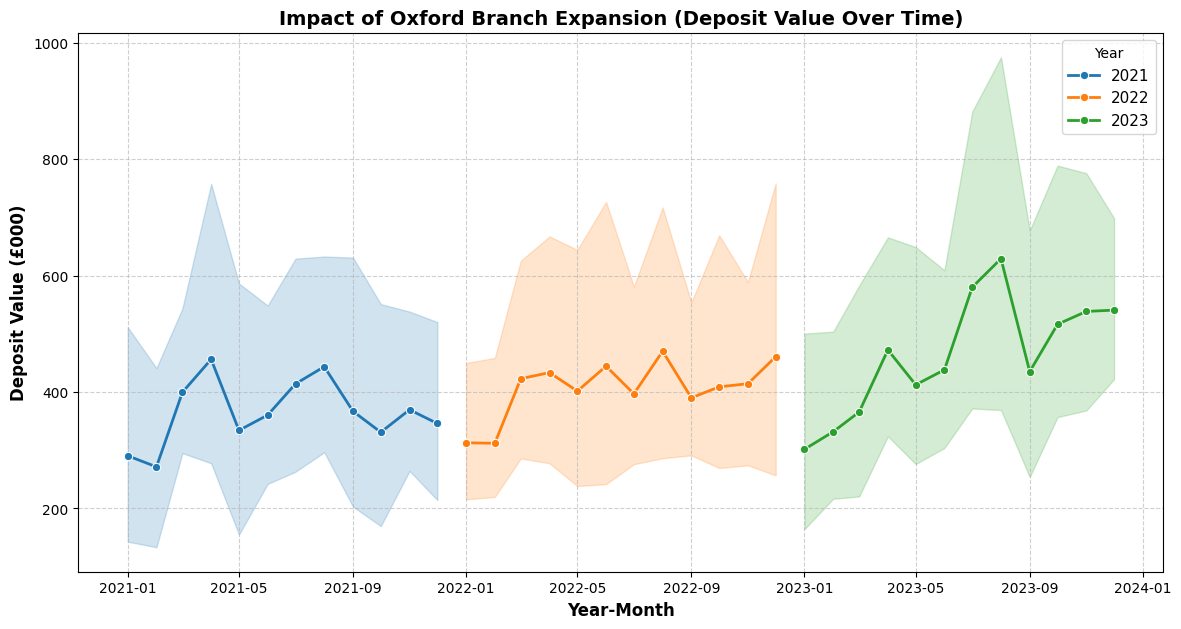

In [24]:
oxford_df = df[df['City bank branch'] == "Oxford"]
# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=oxford_df, x='Date', y='Deposit Value (£000)', hue='Year', 
             marker='o', palette="tab10", linewidth=2)

# Improve labels and title
plt.title("Impact of Oxford Branch Expansion (Deposit Value Over Time)", 
          fontsize=14, fontweight='bold')
plt.xlabel("Year-Month", fontsize=12, fontweight='bold')
plt.ylabel("Deposit Value (£000)", fontsize=12, fontweight='bold')

# Customize legend
plt.legend(title="Year", fontsize=11)

# Improve grid and background
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Show the plot
plt.show()